In [2]:
!pip install chart_studio

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11448 sha256=79dc68d2e185f0e3e2a45fc6e4817f8b4b5a5ac9503e5e2a420d092a200f3fa9
  Stored in directory: c:\users\zaida\appdata\local\pip\cache\wheels\ce\18\7f\e9527e3e66db1456194ac7f61eb3211068c409edceecff2d31
Successfully built retrying


In [22]:
!pip install plotly

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

### 1. Data preprocessing

In [23]:
df = pd.read_csv('Downloads/MSFT_test_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       378 non-null    object 
 1   Open       378 non-null    float64
 2   High       378 non-null    float64
 3   Low        378 non-null    float64
 4   Close      378 non-null    float64
 5   Adj Close  378 non-null    float64
 6   Volume     378 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.8+ KB


<AxesSubplot:>

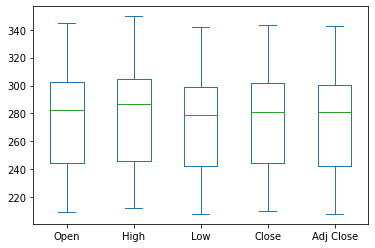

In [24]:
df[['Open','High', 'Low', 'Close', 'Adj Close']].plot(kind='box')

#### Setting the layout for our plot

In [25]:
layout = go.Layout(
    title = 'Stock Prices of Microsoft',
    xaxis = dict(
        title = 'Date',
        titlefont = dict(
            family = 'Courier New, monoscope',
            size = 18,
            color = '#7f7f7f'
        )
    ),
    yaxis = dict(
        title = 'Price',
        titlefont = dict(
            family = 'Courier New, monoscope',
            size = 18,
            color = '#7f7f7f'
        )
    )
)

In [26]:
df_data = [{'x':df['Date'], 'y':df['Adj Close']}]
plot = go.Figure(data = df_data, layout=layout)

In [27]:
iplot(plot)

### 2. Split dataset

In [28]:
#split the data into train and test set
from sklearn.model_selection import train_test_split
x = np.array(df.index).reshape(-1,1)
y = df['Adj Close']
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.3, random_state=101)

In [29]:
x_train.shape

(264, 1)

In [30]:
x_test.shape

(114, 1)

### 3. Build model

In [10]:
#Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [11]:
#Feature scaling
scaler = StandardScaler().fit(x_train)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
#Creating linear regression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

### 4. Prediction

In [14]:
y_pred = lm.predict(x_test)

In [15]:
y_pred.shape

(114,)

In [17]:
y_test

299    296.097748
307    300.329010
179    287.843903
172    284.881195
81     235.124802
          ...    
374    261.119995
90     229.976746
340    303.679993
208    304.033936
78     233.845230
Name: Adj Close, Length: 114, dtype: float64

### 5. Visualization

In [18]:
#Plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = x_test.T[0],
    y = y_test,
    mode = 'markers',
    name = 'Actual')
trace1 = go.Scatter(
    x = x_test.T[0],
    y = y_pred,
    mode = 'lines',
    name = 'Predicted')
df2_data = [trace0, trace1]
#layout.xaxis.title.text = 'Date'
plot2 = go.Figure(data = df2_data, layout=layout)

In [19]:
iplot(plot2)

### 6. Model Accuracy

In [20]:
#calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(y_train, lm.predict(x_train))}\t{r2_score(y_test, lm.predict(x_test))}
{'MSE'.ljust(10)}{mse(y_train, lm.predict(x_train))}\t{mse(y_test, lm.predict(x_test))}
'''

In [21]:
print(scores)


Metric           Train                Test        
r2_score  0.6162973386361748	0.654958299613251
MSE       515.2285628430839	510.53967011000157

